In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics

# Decision Tree -- (drug200) dataset:

## load the drug dataset for classification:

In [15]:
drugs = pd.read_csv('drug200.csv', encoding='utf-8')
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [16]:
#explore the data:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [17]:
print(drugs['Cholesterol'].unique(),' -- ',drugs['Drug'].unique())

['HIGH' 'NORMAL']  --  ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [21]:
#change the string to numric for the model:
drugs['Sex'] = drugs['Sex'].replace({'F' : 1, 'M' : 0})
drugs['BP'] = drugs['BP'].replace({'HIGH' : 2, 'NORMAL' : 1, 'LOW' : 0})
drugs['Cholesterol'] = drugs['Cholesterol'].replace({'HIGH' : 1, 'NORMAL' : 0})
drugs['Drug'] = drugs['Drug'].replace({'drugA' : 4, 'drugB' : 3, 'drugC' : 2 , 'drugX' : 1, 'drugY' : 0})

drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,0
1,47,0,0,1,13.093,2
2,47,0,0,1,10.114,2
3,28,1,1,1,7.798,1
4,61,1,0,1,18.043,0


## Build the model:

steps:
- split the data.
- standarizing the data.
- create the model.
- train the model.
- evaluate the model.
- visualize the model.

In [23]:
# split the data:
x = drugs.drop(columns=['Drug'])
y = drugs['Drug']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

print(f'train shape: {x_train.shape} -- test shape: {x_test.shape}')

train shape: (140, 5) -- test shape: (60, 5)


In [24]:
# standraize the data:
standard = StandardScaler()
x_train_std = standard.fit_transform(x_train)
x_test_std = standard.transform(x_test)

In [25]:
# build the model then train it:

tree_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
tree_model.fit(x_train_std,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [26]:
#predicate the values(classes) and evaluate the accuarcy:
y_pred = tree_model.predict(x_test_std)

print(f'Accuaracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuaracy: 1.0


In [38]:
# to see the arrange of classes
tree_model.classes_

array([0, 1, 2, 3, 4])

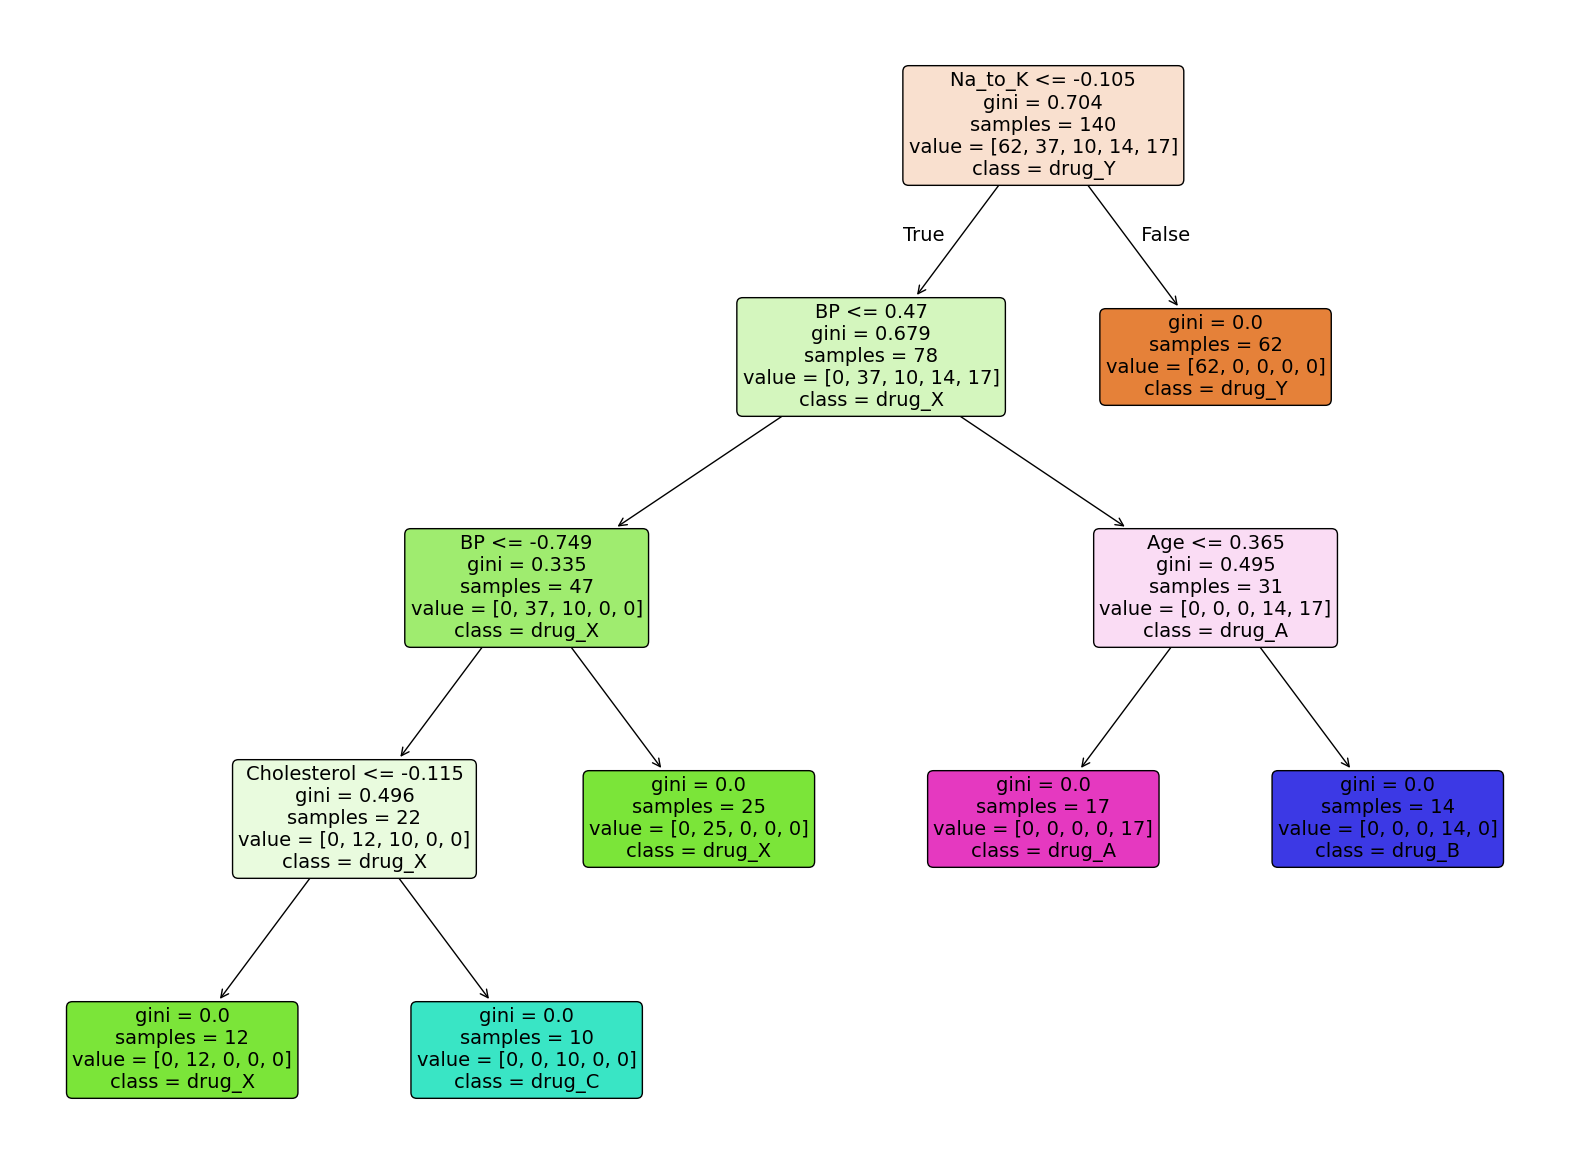

In [39]:
# visualizing the model:
'''
Remamber:
{'drugA' : 4, 'drugB' : 3, 'drugC' : 2 , 'drugX' : 1, 'drugY' : 0}
'''

plt.figure(figsize=(20,15))
plot_tree(decision_tree=tree_model,feature_names=list(x_test.columns),class_names=['drug_Y','drug_X','drug_C', 'drug_B','drug_A'],
          filled=True,rounded=True,fontsize=14)
plt.show()

**insights:**
- From the graph, we see that our model predict the classes well, the gini index in the graph gave small values, which mean the
  misclassification in the model is little.

# Random Forest -- new dataset (Load Boston):

## Load and store the dataset for Regression:

In [44]:
# import:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor

# store dataset:
california_house = fetch_california_housing()

# check from data:
california_house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## Train the model:

steps:
- split the data.
- stadraizing the data.
- duild and train the model.
- evaluate the model.
- visualizing the model.

In [47]:
# split:
x_california = california_house.data
y_california = california_house.target

x_california_train, x_california_test, y_california_train, y_california_test = train_test_split(x_california, y_california, test_size=0.3, random_state=23)

print(f'train shape: {x_california_train.shape} -- test shape: {x_california_test.shape}')

train shape: (14448, 8) -- test shape: (6192, 8)


In [48]:
# standarize the data:
standard2 = StandardScaler()
x_california_train_std = standard2.fit_transform(x_california_train)
x_california_test_std = standard2.transform(x_california_test)

In [54]:
# build and train the model:
randomForest_model = RandomForestRegressor(n_estimators=100, random_state=23)

randomForest_model.fit(x_california_train_std,y_california_train)

RandomForestRegressor(random_state=23)

In [53]:
# predict the values and evaluate the R2 score(accuracy score for regression):
y_california_predict = randomForest_model.predict(x_california_test_std)

print(f'Accucarcy: {metrics.r2_score(y_california_test, y_california_predict)}')

Accucarcy: 0.8107395747196504


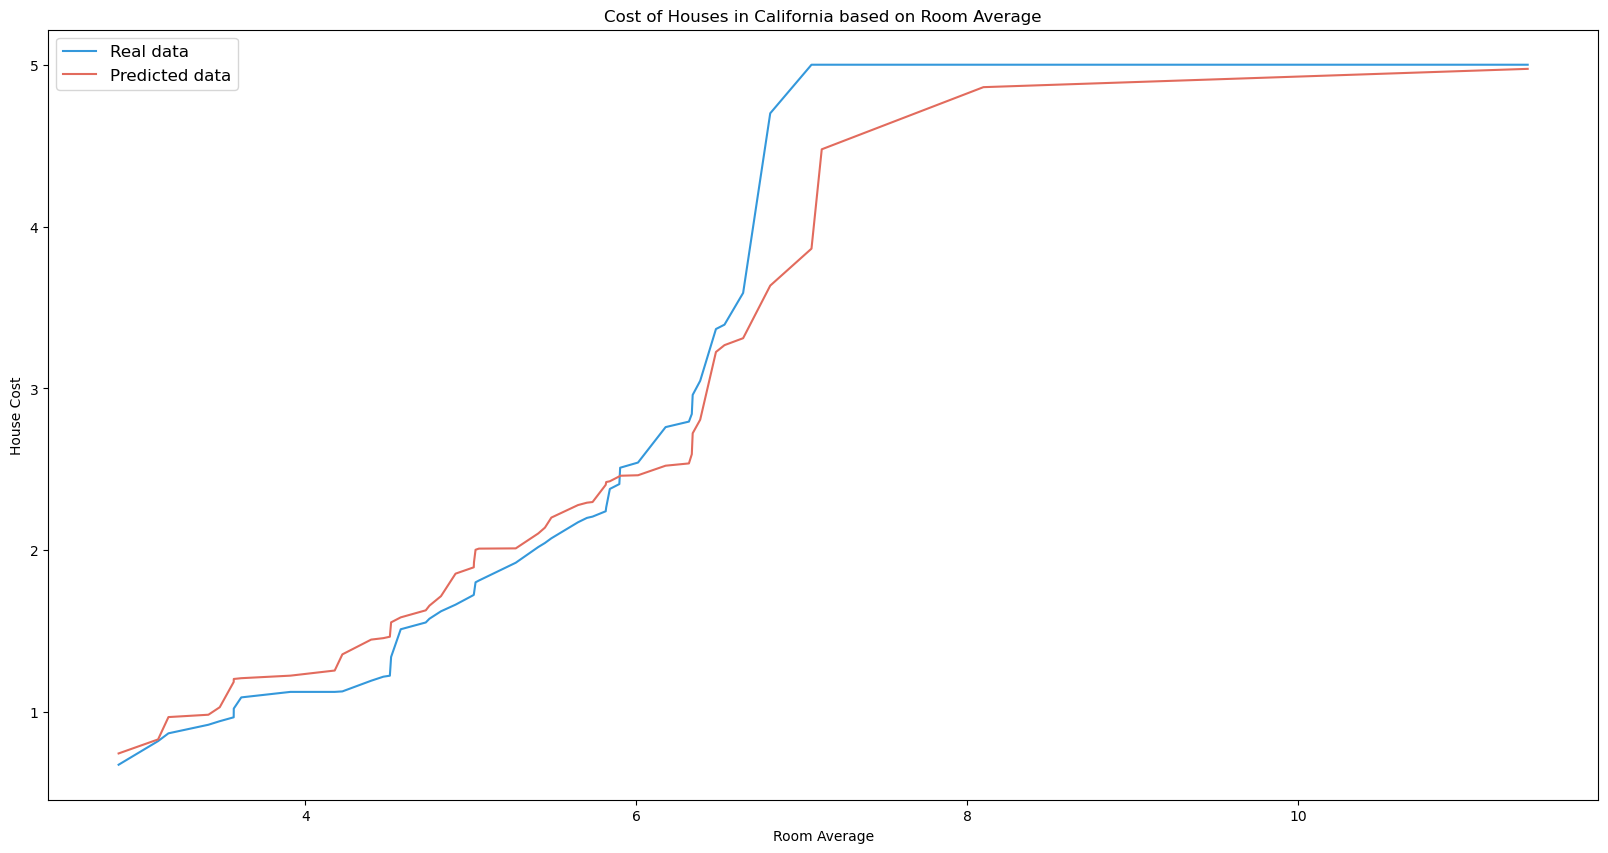

In [79]:
# visualiseing the result:

plt.figure(figsize=(20,10))
plt.plot(sorted(x_california_test[0:50, 2]), sorted(y_california_test[0:50]), color='#3498db', label = 'Real data')
plt.plot(sorted(x_california_test[0:50, 2]), sorted(y_california_predict[0:50]), label = 'Predicted data', color='#e26b5d')
plt.legend(fontsize=12)
plt.title('Cost of Houses in California based on Room Average')
plt.xlabel('Room Average')
plt.ylabel('House Cost')
plt.show()

**insights:**
- From the graph, we see that them model predict the house prices approximately 80% correctly.
- At 'Room-avg' between 6.5 and 7.7 it has a bigger gap than other periods.
- To have more accurate, we can use another model, such as svm.SVR, LinearRegression, or tunnig the same model. Also we can check from data, or add
  more data to data training.